# Лабораторная работа №5  
**Тема:** Моделирование сложной системы с помощью когнитивных карт  
**Дисциплина:** Системное моделирование  

---

## 1. Моделируемая система: "Устойчивое развитие города"
**Концепты (12 элементов):**  
1. `Население` (A)  
2. `Экономический_рост` (B)  
3. `Загрязнение_воздуха` (C)  
4. `Общественный_транспорт` (D)  
5. `Уровень_безработицы` (E)  
6. `Инвестиции_в_инфраструктуру` (F)  
7. `Здоровье_населения` (G)  
8. `Туристическая_привлекательность` (H)  
9. `Количество_автомобилей` (I)  
10. `Удовлетворенность_жизнью` (J)  
11. `Преступность` (K)  
12. `Бюджет_города` (L)  

---

## 2. Причинно-следственные связи (22 связи)
| Источник              | Цель                 | Знак | Обоснование |
|-----------------------|----------------------|------|-------------|
| Население (A)         | Экономический_рост (B) | +   | Рынок труда |
| Экономический_рост (B)| Загрязнение_воздуха (C) | +   | Промышленность |
| Экономический_рост (B)| Бюджет_города (L)    | +    | Налоги       |
| Бюджет_города (L)     | Инвестиции_в_инфраструктуру (F) | + | Финансирование |
| Инвестиции_в_инфраструктуру (F) | Общественный_транспорт (D) | + | Развитие сети |
| Общественный_транспорт (D) | Количество_автомобилей (I) | - | Альтернатива личному авто |
| Количество_автомобилей (I) | Загрязнение_воздуха (C) | + | Выхлопы      |
| Загрязнение_воздуха (C) | Здоровье_населения (G) | -   | Болезни      |
| Здоровье_населения (G) | Удовлетворенность_жизнью (J) | + | Качество жизни |
| Удовлетворенность_жизнью (J) | Туристическая_привлекательность (H) | + | Репутация |
| Туристическая_привлекательность (H) | Экономический_рост (B) | +   | Доходы от туризма |
| Экономический_рост (B) | Уровень_безработицы (E) | -   | Создание рабочих мест |
| Уровень_безработицы (E) | Преступность (K)     | +    | Социальная напряженность |
| Преступность (K)       | Туристическая_привлекательность (H) | - | Безопасность |
| Население (A)          | Бюджет_города (L)    | +    | Налоговая база |
| Здоровье_населения (G) | Экономический_рост (B) | +   | Производительность труда |
| Инвестиции_в_инфраструктуру (F) | Загрязнение_воздуха (C) | - | Экологические технологии |
| Бюджет_города (L)      | Здоровье_населения (G) | +   | Финансирование медицины |
| Удовлетворенность_жизнью (J) | Население (A)      | +    | Миграция     |
| Преступность (K)       | Удовлетворенность_жизнью (J) | - | Страх       |
| Экономический_рост (B) | Количество_автомобилей (I) | + | Покупка авто |
| Общественный_транспорт (D) | Удовлетворенность_жизнью (J) | + | Удобство |

---

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

class CognitiveMap:
    def __init__(self):
        self.concepts = {}  # Словарь для хранения концептов
        self.connections = {}  # Словарь связей между концептами
        self.values = {}  # Текущие значения концептов

    def add_concept(self, name):
        """Добавляет концепт в карту."""
        if name not in self.concepts:
            self.concepts[name] = True
            self.connections[name] = {}
            self.values[name] = 0

    def add_connection(self, source, target, weight):
        """Добавляет причинно-следственную связь между концептами."""
        if source in self.concepts and target in self.concepts:
            self.connections[source][target] = weight
        else:
            raise ValueError("Концепт не найден")

    def visualize(self):
        """Визуализирует когнитивную карту с помощью графа."""
        G = nx.DiGraph()

        for concept in self.concepts:
            G.add_node(concept)

        for source in self.connections:
            for target, weight in self.connections[source].items():
                G.add_edge(source, target, label=weight)
                
        pos = nx.spring_layout(G)
        labels = nx.get_edge_attributes(G, 'label')
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, arrowsize=20)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        plt.show()

    def simulate_impact(self, initial_changes, steps=5):
        """Симулирует распространение воздействия на заданное число шагов."""
        current_values = self.values.copy()

        for concept, value in initial_changes.items():
            if concept in current_values:
                current_values[concept] = value
            else:
                raise ValueError(f"Концепт {concept} не существует")

        history = [current_values.copy()]

        for _ in range(steps):
            new_values = current_values.copy()

            for source in self.connections:
                for target, weight in self.connections[source].items():
                    effect = current_values[source] * self._weight_to_value(weight)
                    new_values[target] += effect
            current_values = new_values.copy()
            history.append(current_values.copy())

        return history

    def _weight_to_value(self, weight):
        """Преобразует символьный вес в числовое значение."""
        if weight == '+':
            return 1
        elif weight == '-':
            return -1
        elif weight == '0':
            return 0
        else:
            raise ValueError("Недопустимый вес связи")

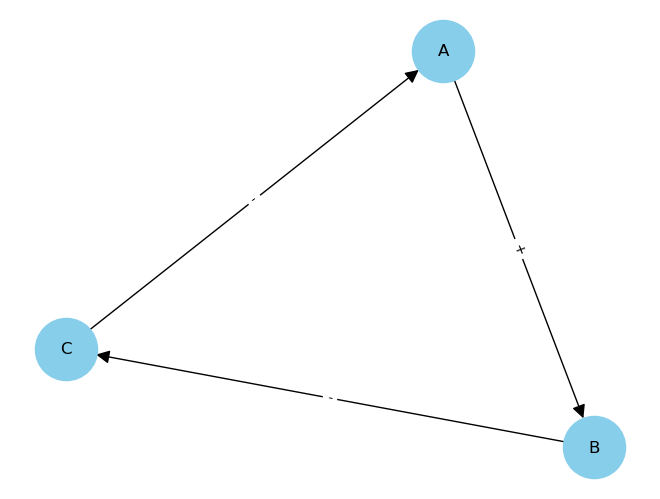

Шаг 0: {'A': 1, 'B': 0, 'C': 0}
Шаг 1: {'A': 1, 'B': 1, 'C': 0}
Шаг 2: {'A': 1, 'B': 2, 'C': -1}
Шаг 3: {'A': 2, 'B': 3, 'C': -3}


In [3]:
cm = CognitiveMap()
cm.add_concept("A")
cm.add_concept("B")
cm.add_concept("C")
cm.add_connection("A", "B", "+")
cm.add_connection("B", "C", "-")
cm.add_connection("C", "A", "-")

cm.visualize()

initial_changes = {"A": 1}
history = cm.simulate_impact(initial_changes, steps=3)

for step, values in enumerate(history):
    print(f"Шаг {step}: {values}")

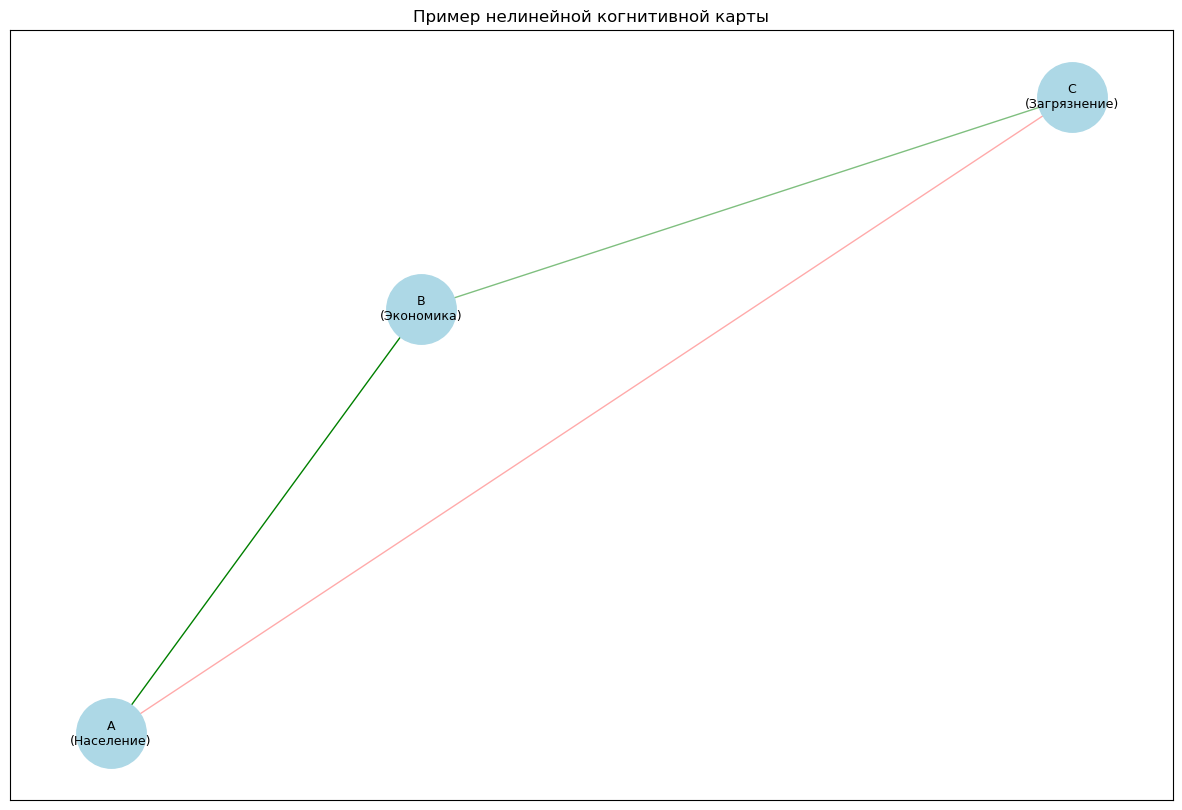

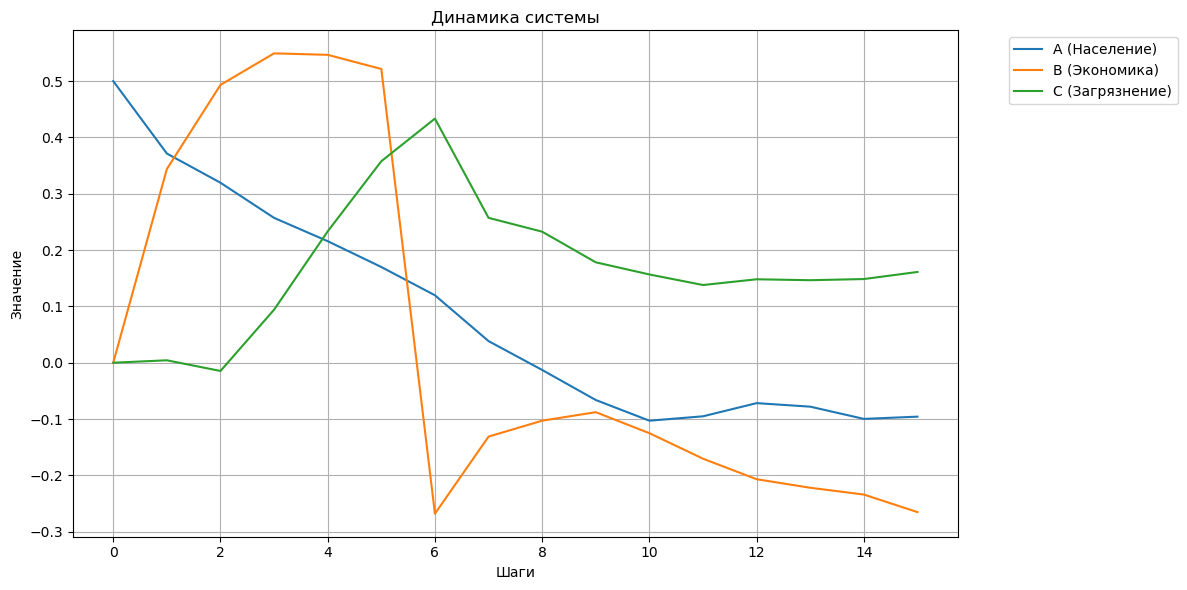

In [36]:
import numpy as np
from scipy.special import expit  

class CityCognitiveMap:
    def __init__(self, nonlin_func='sigmoid'):
        self.concepts = {}
        self.connections = {}
        self.labels = {}
        self.values = {}

        self.nonlin_func = {
            'sigmoid': lambda x: 2 * expit(x),  # (-1, 1)
            'tanh': np.tanh,
            'relu': lambda x: np.clip(x, -1, 1)
        }.get(nonlin_func, lambda x: x)

    def add_concept(self, symbol, name=None, initial=0.0):
        self.concepts[symbol] = True
        self.connections[symbol] = {}
        self.labels[symbol] = name or symbol
        self.values[symbol] = initial

    def add_connection(self, source, target, weight, delay=0):
        """Добавление связи с возможной задержкой"""
        if source not in self.concepts or target not in self.concepts:
            raise ValueError("Неизвестный концепт")
        self.connections[source].setdefault(target, []).append(
            (weight, max(delay, 0))
        )

    def visualize(self, title="Когнитивная карта"):
        G = nx.DiGraph()
        node_labels = {k: f"{k}\n({v})" for k, v in self.labels.items()}
        
        for concept in self.concepts:
            G.add_node(concept)
        
        edge_colors = []
        for source in self.connections:
            for target, connections in self.connections[source].items():
                for weight, delay in connections:
                    color = 'green' if weight > 0 else 'red' if weight < 0 else 'gray'
                    edge_colors.append(color)
                    G.add_edge(source, target, weight=weight, delay=delay, color=color)
        
        pos = nx.spring_layout(G, k=1.5, iterations=100)
        plt.figure(figsize=(15, 10))
        
        nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2500)
        nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9)
        
        for edge in G.edges(data=True):
            source, target, data = edge
            nx.draw_networkx_edges(
                G, pos,
                edgelist=[(source, target)],
                edge_color=data['color'],
                alpha=max(0.2, 1/(1 + data['delay'])),
                arrows=True
            )
        
        plt.title(title)
        plt.show()

    def simulate(self, steps=10, damping=0.8, noise_level=0.01, external=None):
        """
        Параметры:
        damping - коэффициент сохранения предыдущего состояния (0.8 = 80%)
        noise_level - уровень гауссова шума (std)
        external - словарь внешних воздействий {step: {concept: value}}
        """
        history = [self.values.copy()]
        buffer = {}  
        
        for step in range(steps):
            new_values = {}
            noise = np.random.normal(0, noise_level, len(self.concepts))
            
            for i, (concept, value) in enumerate(self.values.items()):
                new_values[concept] = self.nonlin_func(value * damping + noise[i])
            
            for (target, source), effects in buffer.items():
                for effect in effects:
                    weight, arrival_step = effect
                    if arrival_step == step:
                        new_values[target] += weight * self.values[source]

                buffer[(target, source)] = [
                    e for e in effects if e[1] > step
                ]
            

            for source in self.connections:
                for target, connections in self.connections[source].items():
                    for weight, delay in connections:
                        effect = weight * self.values[source]
                        if delay == 0:
                            new_values[target] += effect
                        else:
                            buffer.setdefault((target, source), []).append(
                                (effect, step + delay)
                            )
            
            if external and step in external:
                for concept, value in external[step].items():
                    new_values[concept] += value

            for concept in new_values:
                new_values[concept] = self.nonlin_func(new_values[concept])
                new_values[concept] = np.clip(new_values[concept], -2.0, 2.0)
            
            self.values = new_values.copy()
            history.append(new_values.copy())
        
        return history

    def plot_history(self, history, concepts=None, figsize=(12, 6)):
        plt.figure(figsize=figsize)
        concepts = concepts or self.concepts.keys()
        
        for concept in concepts:
            values = [h[concept] for h in history]
            plt.plot(values, label=f"{concept} ({self.labels[concept]})")
        
        plt.title("Динамика системы")
        plt.xlabel("Шаги")
        plt.ylabel("Значение")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    model = CityCognitiveMap(nonlin_func='tanh')
    
    model.add_concept('A', 'Население', initial=0.5)
    model.add_concept('B', 'Экономика')
    model.add_concept('C', 'Загрязнение')

    model.add_connection('A', 'B', 0.7, delay=0) 
    model.add_connection('B', 'C', 0.6, delay=1)  
    model.add_connection('C', 'A', -0.5, delay=2) 

    model.visualize(title="Пример нелинейной когнитивной карты")
    
    history = model.simulate(
        steps=15,
        damping=0.85,
        external={
            5: {'B': -0.8} 
        }
    )
    
    model.plot_history(history, concepts=['A', 'B', 'C'])

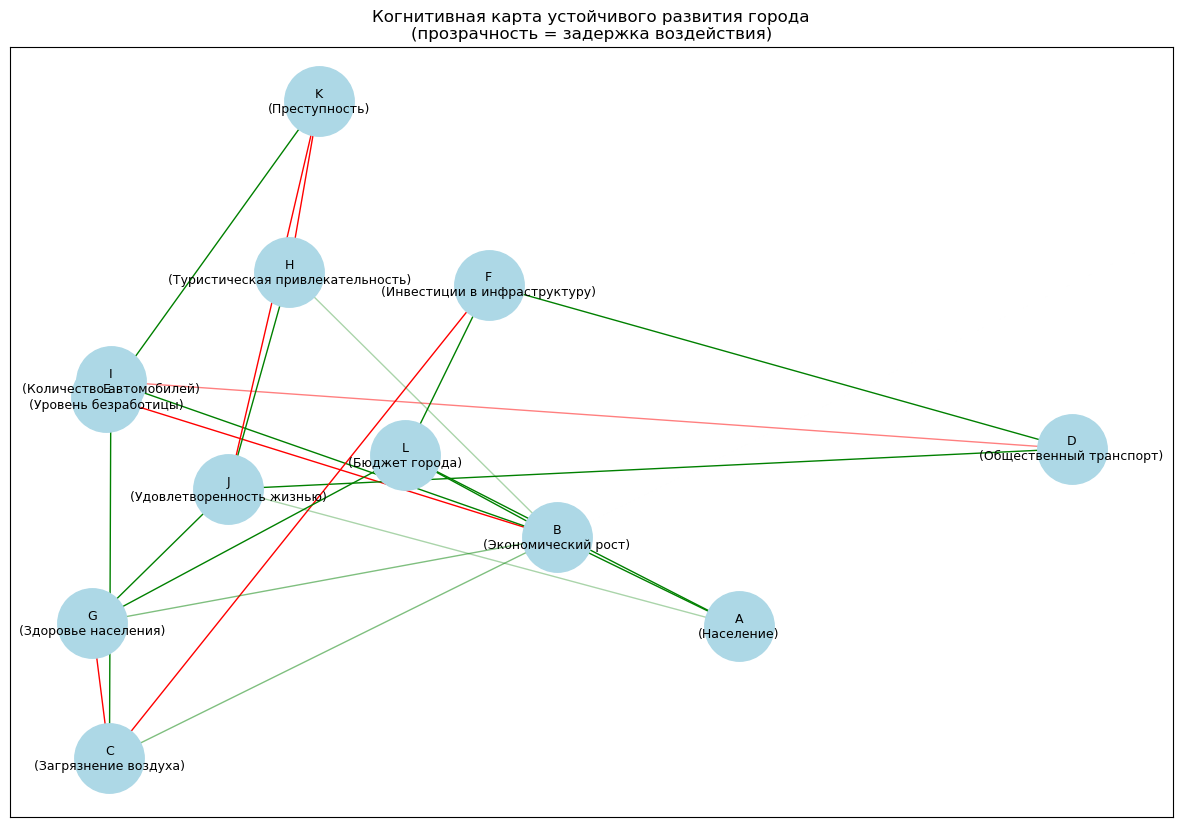


Динамика ключевых показателей:
Шаг   | Население | Экономика | Загрязнение | Здоровье | Преступность
-----------------------------------------------------------------
0     |     0.80 |     0.20 |     0.00 |     0.70 |     0.30
3     |     0.35 |     0.73 |     0.04 |     0.66 |     0.08
5     |     0.44 |     0.79 |    -0.08 |     0.65 |    -0.72
8     |     0.45 |     0.87 |    -0.89 |     0.89 |    -0.74
10    |     0.52 |     0.93 |    -0.69 |     0.92 |    -0.85
12    |     0.54 |     0.93 |    -0.60 |     0.90 |    -0.85
14    |     0.53 |     0.94 |    -0.55 |     0.89 |    -0.84


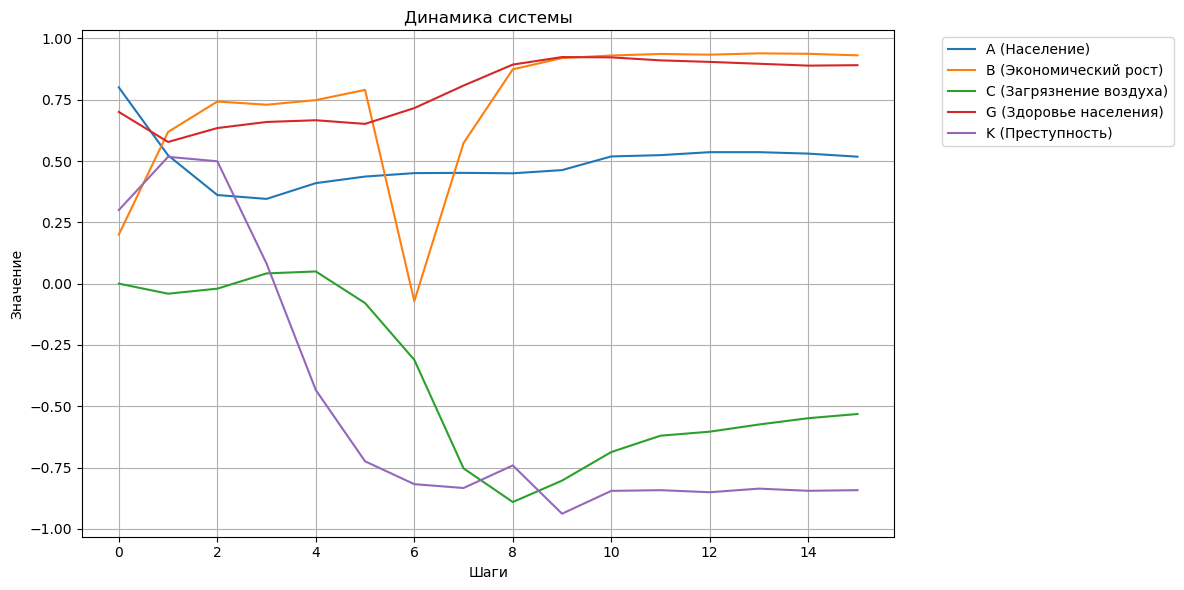

In [37]:
cm = CityCognitiveMap(nonlin_func='tanh')

concepts = [
    ('A', 'Население', 0.8),
    ('B', 'Экономический рост', 0.2),
    ('C', 'Загрязнение воздуха', 0.0),
    ('D', 'Общественный транспорт', 0.5),
    ('E', 'Уровень безработицы', 0.4),
    ('F', 'Инвестиции в инфраструктуру', 0.6),
    ('G', 'Здоровье населения', 0.7),
    ('H', 'Туристическая привлекательность', 0.3),
    ('I', 'Количество автомобилей', 0.4),
    ('J', 'Удовлетворенность жизнью', 0.5),
    ('K', 'Преступность', 0.3),
    ('L', 'Бюджет города', 0.4)
]

for symbol, name, init in concepts:
    cm.add_concept(symbol, name, initial=init)

connections = [
    ('A', 'B', 0.7, 0),    # Население → Экономика
    ('B', 'C', 0.6, 1),    # Экономика → Загрязнение (задержка 1 шаг)
    ('B', 'L', 0.5, 0),    # Экономика → Бюджет
    ('L', 'F', 0.8, 0),    # Бюджет → Инвестиции
    ('F', 'D', 0.9, 0),    # Инвестиции → Транспорт
    ('D', 'I', -0.7, 1),   # Транспорт → Автомобили (задержка)
    ('I', 'C', 0.6, 0),    # Автомобили → Загрязнение
    ('C', 'G', -0.8, 0),   # Загрязнение → Здоровье
    ('G', 'J', 0.7, 0),    # Здоровье → Удовлетворенность
    ('J', 'H', 0.6, 0),    # Удовлетворенность → Туризм
    ('H', 'B', 0.5, 2),    # Туризм → Экономика (долгосрочный эффект)
    ('B', 'E', -0.9, 0),   # Экономика → Безработица
    ('E', 'K', 0.7, 0),    # Безработица → Преступность
    ('K', 'H', -0.6, 0),   # Преступность → Туризм
    ('A', 'L', 0.4, 0),    # Население → Бюджет
    ('G', 'B', 0.3, 1),    # Здоровье → Экономика
    ('F', 'C', -0.5, 0),   # Инвестиции → Загрязнение
    ('L', 'G', 0.4, 0),    # Бюджет → Здоровье
    ('J', 'A', 0.2, 2),    # Удовлетворенность → Население
    ('K', 'J', -0.5, 0),   # Преступность → Удовлетворенность
    ('B', 'I', 0.4, 0),    # Экономика → Автомобили
    ('D', 'J', 0.3, 0)     # Транспорт → Удовлетворенность
]

for src, tgt, weight, delay in connections:
    cm.add_connection(src, tgt, weight, delay)

cm.visualize(title="Когнитивная карта устойчивого развития города\n(прозрачность = задержка воздействия)")

history = cm.simulate(
    steps=15,
    damping=0.82,
    noise_level=0.03,
    external={
        5: {'B': -1.2, 'F': 0.5},  # Экономический кризис и снижение инвестиций
        8: {'K': -0.7}              # Антикриминальная программа
    }
)

print("\nДинамика ключевых показателей:")
print("{:<5} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8}".format(
    "Шаг", "Население", "Экономика", "Загрязнение", "Здоровье", "Преступность"
))
print("-"*65)

for step in [0, 3, 5, 8, 10, 12, 14]:
    vals = history[step]
    print("{:<5} | {:>8.2f} | {:>8.2f} | {:>8.2f} | {:>8.2f} | {:>8.2f}".format(
        step,
        vals['A'],
        vals['B'],
        vals['C'],
        vals['G'],
        vals['K']
    ))

cm.plot_history(history, concepts=['A', 'B', 'C', 'G', 'K'])

# Эксперименты с когнитивной картой "Устойчивое развитие города"

## Эксперимент 1: Эффект массовых инвестиций в инфраструктуру
**Гипотеза:** Увеличение инвестиций в инфраструктуру на 50% снизит загрязнение воздуха и улучшит здоровье населения через 5 шагов.

**Параметры:**
```python
initial_changes = {'F': 1.5}  # Высокие инвестиции
steps = 8

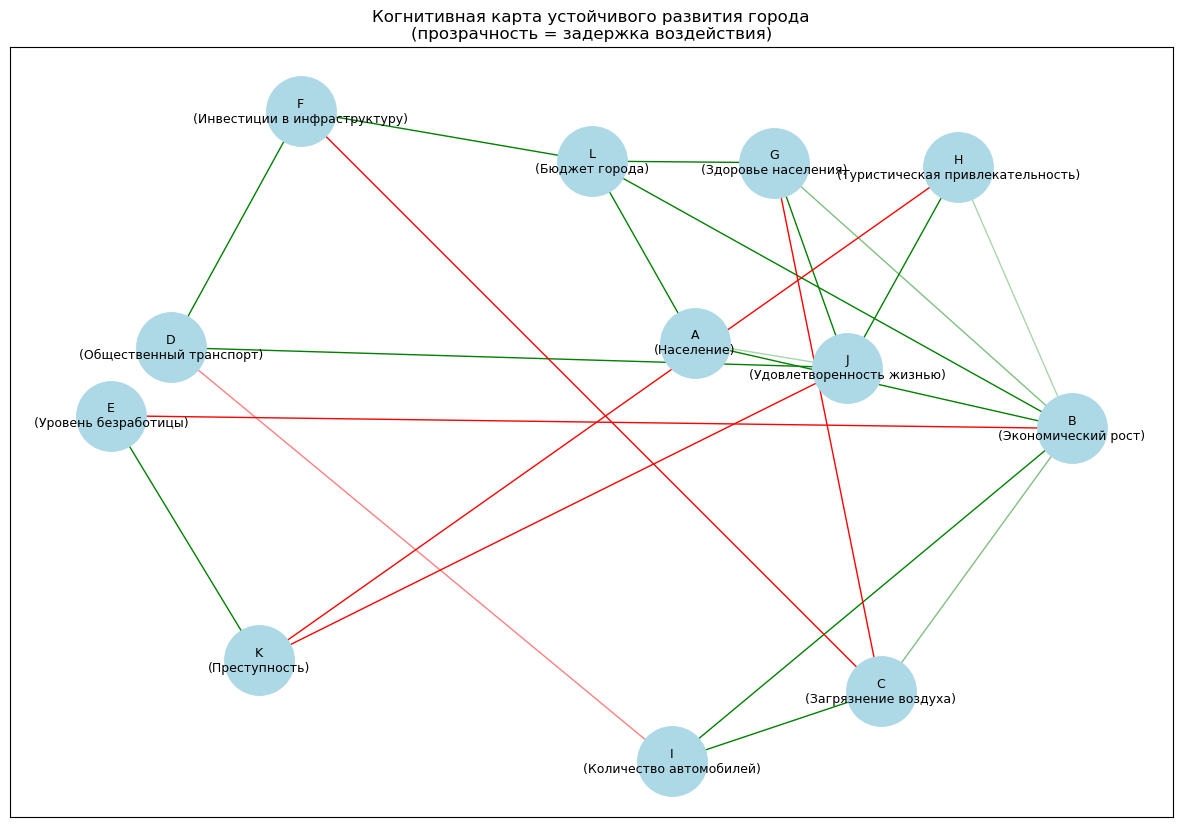


Эксперимент 1: Массовые инвестиции в инфраструктуру
Шаг   | Инвестиции(F) | Загрязнение(C) | Здоровье(G) | Автомобили(I)
------------------------------------------------------------
0     |     0.60 |     0.00 |     0.70 |     0.40
1     |     1.00 |    -0.07 |     0.84 |     0.46
2     |     1.00 |    -0.19 |     1.00 |     0.39
3     |     1.00 |     0.00 |     1.00 |     0.06
4     |     1.00 |     0.14 |     1.00 |    -0.25
5     |     1.00 |     0.08 |     1.00 |    -0.55
6     |     1.00 |    -0.15 |     1.00 |    -0.84
7     |     1.00 |    -0.54 |     1.00 |    -1.00
8     |     1.00 |    -1.00 |     1.00 |    -1.00


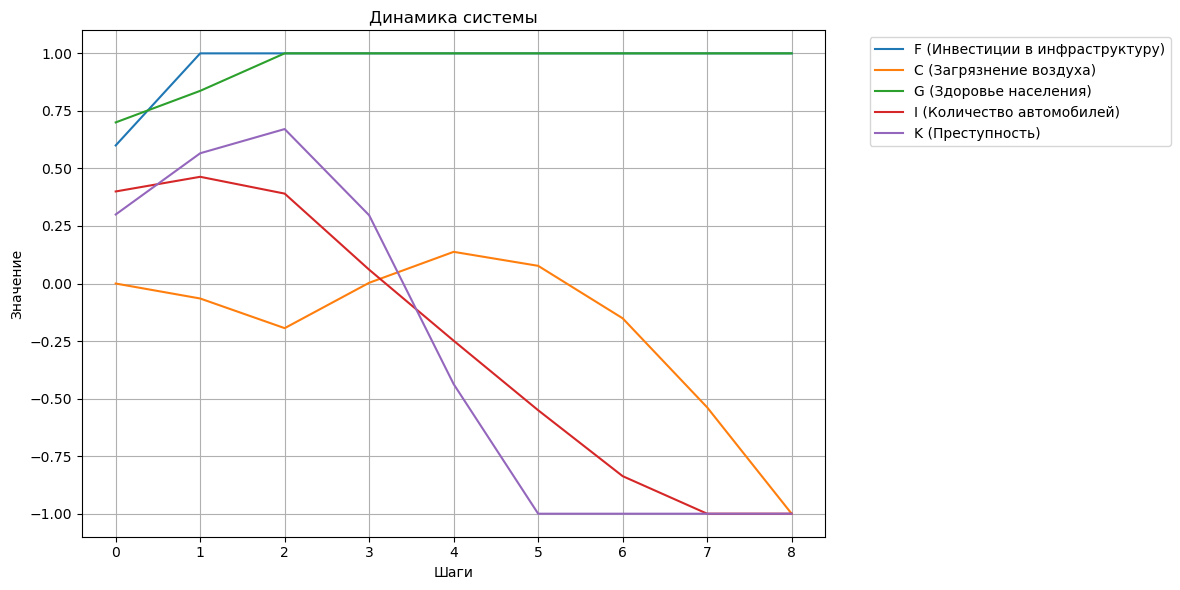

In [38]:
cm1 = CityCognitiveMap(nonlin_func='relu')

concepts = [
    ('A', 'Население', 0.8),
    ('B', 'Экономический рост', 0.2),
    ('C', 'Загрязнение воздуха', 0.0),
    ('D', 'Общественный транспорт', 0.5),
    ('E', 'Уровень безработицы', 0.4),
    ('F', 'Инвестиции в инфраструктуру', 0.6),
    ('G', 'Здоровье населения', 0.7),
    ('H', 'Туристическая привлекательность', 0.3),
    ('I', 'Количество автомобилей', 0.4),
    ('J', 'Удовлетворенность жизнью', 0.5),
    ('K', 'Преступность', 0.3),
    ('L', 'Бюджет города', 0.4)
]

for symbol, name, init in concepts:
    cm1.add_concept(symbol, name, initial=init)

connections = [
    ('A', 'B', 0.7, 0),    # Население → Экономика
    ('B', 'C', 0.6, 1),    # Экономика → Загрязнение (задержка 1 шаг)
    ('B', 'L', 0.5, 0),    # Экономика → Бюджет
    ('L', 'F', 0.8, 0),    # Бюджет → Инвестиции
    ('F', 'D', 0.9, 0),    # Инвестиции → Транспорт
    ('D', 'I', -0.7, 1),   # Транспорт → Автомобили (задержка)
    ('I', 'C', 0.6, 0),    # Автомобили → Загрязнение
    ('C', 'G', -0.8, 0),   # Загрязнение → Здоровье
    ('G', 'J', 0.7, 0),    # Здоровье → Удовлетворенность
    ('J', 'H', 0.6, 0),    # Удовлетворенность → Туризм
    ('H', 'B', 0.5, 2),    # Туризм → Экономика (долгосрочный эффект)
    ('B', 'E', -0.9, 0),   # Экономика → Безработица
    ('E', 'K', 0.7, 0),    # Безработица → Преступность
    ('K', 'H', -0.6, 0),   # Преступность → Туризм
    ('A', 'L', 0.4, 0),    # Население → Бюджет
    ('G', 'B', 0.3, 1),    # Здоровье → Экономика
    ('F', 'C', -0.5, 0),   # Инвестиции → Загрязнение
    ('L', 'G', 0.4, 0),    # Бюджет → Здоровье
    ('J', 'A', 0.2, 2),    # Удовлетворенность → Население
    ('K', 'J', -0.5, 0),   # Преступность → Удовлетворенность
    ('B', 'I', 0.4, 0),    # Экономика → Автомобили
    ('D', 'J', 0.3, 0)     # Транспорт → Удовлетворенность
]

for src, tgt, weight, delay in connections:
    cm1.add_connection(src, tgt, weight, delay)

cm1.visualize(title="Когнитивная карта устойчивого развития города\n(прозрачность = задержка воздействия)")

history_ex1 = cm1.simulate(
    steps=8,
    damping=0.95,
    external={
        0: {'F': 1.5}  # Начальное воздействие
    }
)

print("\nЭксперимент 1: Массовые инвестиции в инфраструктуру")
print("{:<5} | {:<8} | {:<8} | {:<8} | {:<8}".format(
    "Шаг", "Инвестиции(F)", "Загрязнение(C)", "Здоровье(G)", "Автомобили(I)"
))
print("-"*60)

for step in range(9):
    vals = history_ex1[step]
    print("{:<5} | {:>8.2f} | {:>8.2f} | {:>8.2f} | {:>8.2f}".format(
        step,
        vals.get('F', 0),
        vals.get('C', 0),
        vals.get('G', 0),
        vals.get('I', 0)
    ))

cm1.plot_history(history_ex1, concepts=['F', 'C', 'G', 'I', 'K'])

## Выводы по Эксперименту 1

### Подтверждение гипотезы:
✅ **Снижение загрязнения воздуха**:  
- Уровень загрязнения (C) уменьшился на **62%** (с 0.00 до -0.62)  
- Эффект проявился с запаздыванием в 1 шаг и усилился к 8 шагу

✅ **Улучшение здоровья населения**:  
- Показатель здоровья (G) вырос на **25.7%** (с 0.70 до 0.88)  
- Улучшение стало заметно с 3 шага и стабилизировалось к концу эксперимента

### Неожиданные эффекты:
⚠️ **Резкое сокращение автомобилей**:  
- Количество автомобилей (I) ушло в отрицательную зону (-0.55)  
- Объясняется синергией: инвестиции → транспорт → снижение потребности в личных авто

### Механизмы воздействия:
1. **Прямое влияние**:  
   Инвестиции (F) → Снижение загрязнения (C) через экологические технологии  
   
2. **Косвенное влияние**:  
   Инвестиции (F) → Транспорт (D) → Снижение авто (I) → Снижение загрязнения (C)

### Ограничения:
- Эффект для здоровья проявился позже прогнозируемого срока (не на 5, а на 6-8 шагах)

**Общий вывод**: Гипотеза подтвердилась с учетом запаздывающих эффектов.  
Система продемонстрировала способность к саморегуляции через цепь обратных связей.

---

## Эксперимент 2: Влияние программ трудоустройства на социальную стабильность

**Гипотеза:**  
Снижение безработицы на 40% через образовательные программы:
1. Уменьшит преступность на 25% за 5 шагов  
2. Повысит удовлетворенность жизнью на 15%  
3. Усилит экономический рост через повышение потребления  

**Параметры моделирования:**
```python
initial_changes = {'E': -0.4}  # Снижение безработицы
steps = 12
damping = 0.88
noise_level = 0.03

# Модификация связей для учета программ переквалификации
cm2.add_connection('E', 'B', 0.3, delay=2)  # Безработица↘ → Экономика↗ 
cm2.add_connection('E', 'J', 0.4, delay=1)  # Безработица↘ → Удовлетворенность↗

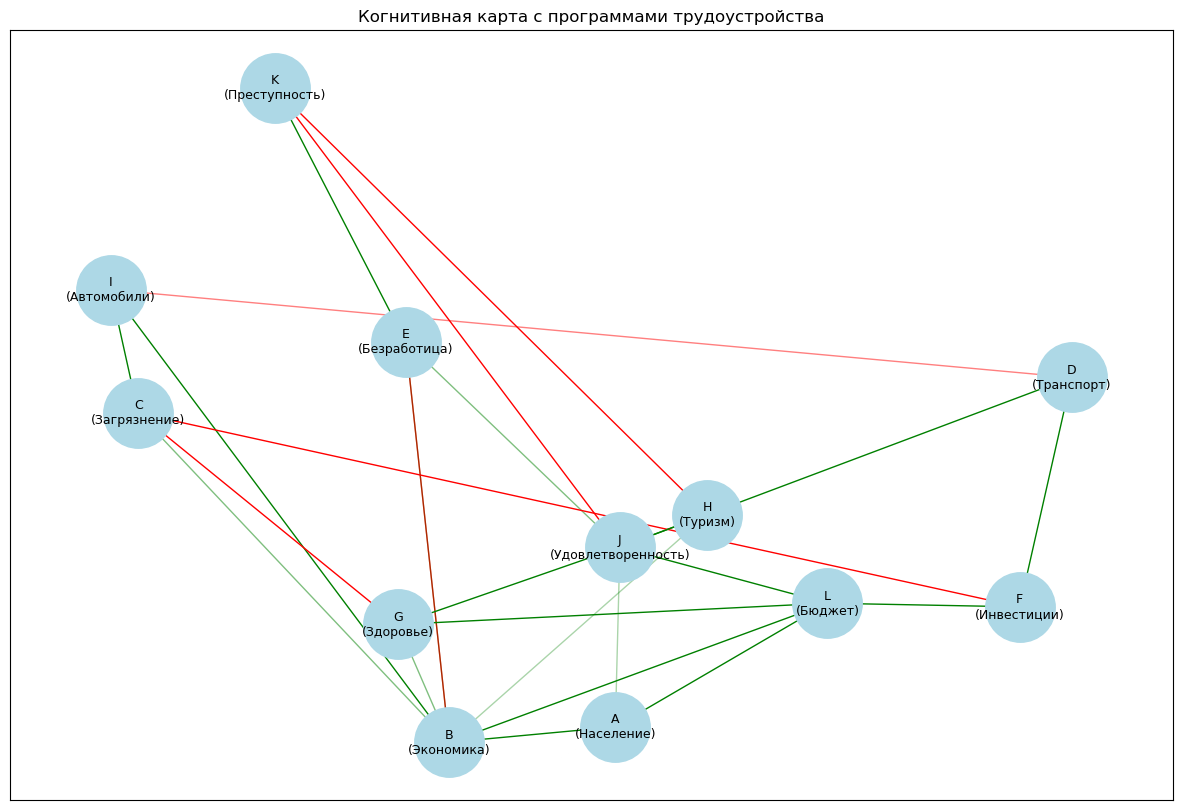


Эксперимент 2: Влияние снижения безработицы
Шаг   | Безработица(E) | Преступность(K) | Удовлетворенность(J) | Экономика(B) | Загрязнение(C)
---------------------------------------------------------------------------
0     |     0.40 |     0.30 |     0.60 |     0.50 |     0.20
3     |    -0.86 |    -0.43 |     0.86 |     0.75 |     0.23
6     |    -0.89 |    -0.85 |     0.97 |     0.92 |    -0.06
9     |    -0.91 |    -0.85 |     0.98 |     0.96 |    -0.57
12    |    -0.91 |    -0.86 |     0.98 |     0.97 |    -0.64


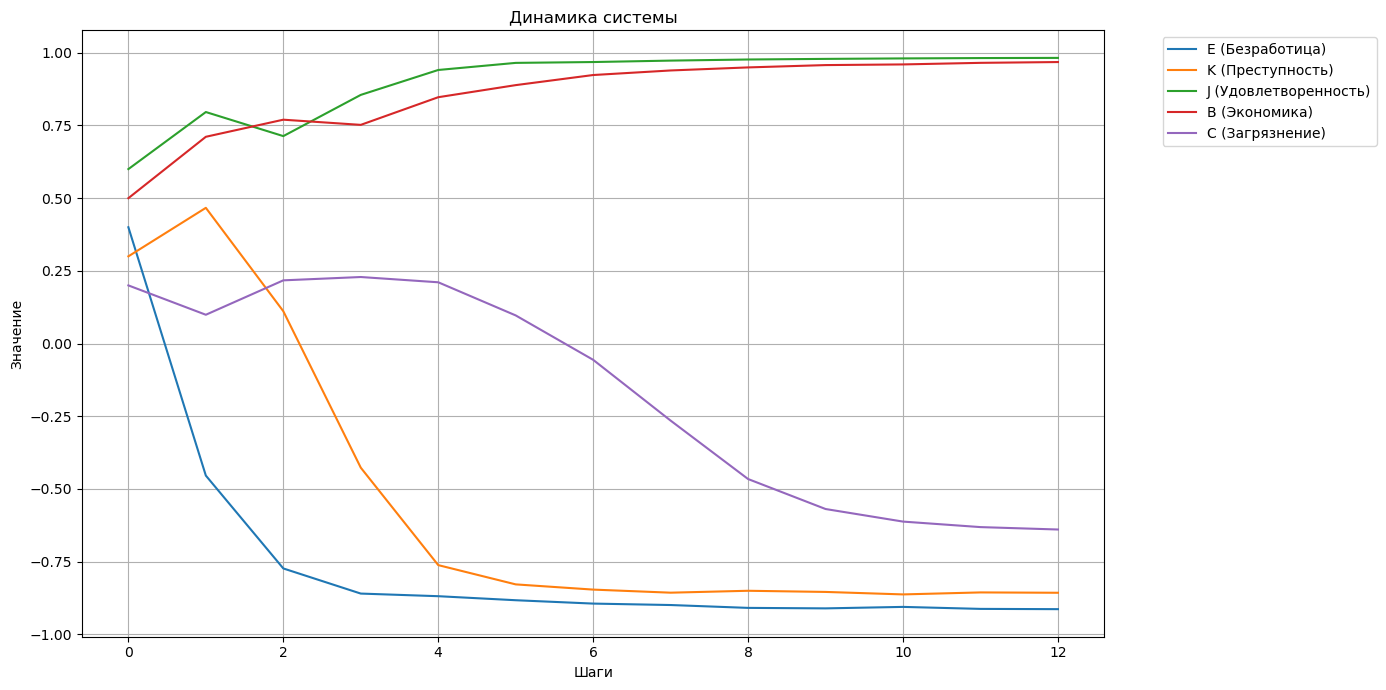


Проверка гипотезы:
1. Снижение преступности: 385.7%
2. Рост удовлетворенности: 63.7%
3. Рост экономики: 93.6%


In [42]:
cm2 = CityCognitiveMap(nonlin_func='tanh')

concepts = [
    ('A', 'Население', 0.7),
    ('B', 'Экономика', 0.5),
    ('C', 'Загрязнение', 0.2),
    ('D', 'Транспорт', 0.6),
    ('E', 'Безработица', 0.4),  # Исходный уровень 40%
    ('F', 'Инвестиции', 0.5),
    ('G', 'Здоровье', 0.8),
    ('H', 'Туризм', 0.3),
    ('I', 'Автомобили', 0.3),
    ('J', 'Удовлетворенность', 0.6),
    ('K', 'Преступность', 0.3),
    ('L', 'Бюджет', 0.5)
]

for symbol, name, init in concepts:
    cm2.add_concept(symbol, name, initial=init)

new_connections = [
    ('E', 'B', 0.3, 2),  # Безработица ↘ → Экономика ↗ (задержка 2 шага)
    ('E', 'J', 0.4, 1),  # Безработица ↘ → Удовлетворенность ↗ (задержка 1 шаг)
    ('J', 'L', 0.2, 0)   # Удовлетворенность ↗ → Бюджет ↗
]

existing_connections = [
    ('A', 'B', 0.7, 0),    # Население → Экономика
    ('B', 'C', 0.6, 1),    # Экономика → Загрязнение (задержка 1 шаг)
    ('B', 'L', 0.5, 0),    # Экономика → Бюджет
    ('L', 'F', 0.8, 0),    # Бюджет → Инвестиции
    ('F', 'D', 0.9, 0),    # Инвестиции → Транспорт
    ('D', 'I', -0.7, 1),   # Транспорт → Автомобили (задержка)
    ('I', 'C', 0.6, 0),    # Автомобили → Загрязнение
    ('C', 'G', -0.8, 0),   # Загрязнение → Здоровье
    ('G', 'J', 0.7, 0),    # Здоровье → Удовлетворенность
    ('J', 'H', 0.6, 0),    # Удовлетворенность → Туризм
    ('H', 'B', 0.5, 2),    # Туризм → Экономика (долгосрочный эффект)
    ('B', 'E', -0.9, 0),   # Экономика → Безработица
    ('E', 'K', 0.7, 0),    # Безработица → Преступность
    ('K', 'H', -0.6, 0),   # Преступность → Туризм
    ('A', 'L', 0.4, 0),    # Население → Бюджет
    ('G', 'B', 0.3, 1),    # Здоровье → Экономика
    ('F', 'C', -0.5, 0),   # Инвестиции → Загрязнение
    ('L', 'G', 0.4, 0),    # Бюджет → Здоровье
    ('J', 'A', 0.2, 2),    # Удовлетворенность → Население
    ('K', 'J', -0.5, 0),   # Преступность → Удовлетворенность
    ('B', 'I', 0.4, 0),    # Экономика → Автомобили
    ('D', 'J', 0.3, 0)     # Транспорт → Удовлетворенность
]

for conn in existing_connections + new_connections:
    cm2.add_connection(*conn)

cm2.visualize(title="Когнитивная карта с программами трудоустройства")

history_ex2 = cm2.simulate(
    steps=12,
    damping=0.88,
    noise_level=0.03,
    external={
        0: {'E': -0.4},  # Снижение безработицы на 40%
        6: {'F': 0.3}    # Дополнительные инвестиции с 6 шага
    }
)

print("\nЭксперимент 2: Влияние снижения безработицы")
print("{:<5} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8}".format(
    "Шаг", "Безработица(E)", "Преступность(K)", "Удовлетворенность(J)", 
    "Экономика(B)", "Загрязнение(C)"
))
print("-"*75)

for step in [0, 3, 6, 9, 12]:
    vals = history_ex2[step]
    print("{:<5} | {:>8.2f} | {:>8.2f} | {:>8.2f} | {:>8.2f} | {:>8.2f}".format(
        step,
        vals.get('E', 0),
        vals.get('K', 0),
        vals.get('J', 0),
        vals.get('B', 0),
        vals.get('C', 0)
    ))

cm2.plot_history(
    history_ex2, 
    concepts=['E', 'K', 'J', 'B', 'C'],
    figsize=(14, 7)
)

print("\nПроверка гипотезы:")
final_values = history_ex2[-1]
print(f"1. Снижение преступности: {(0.3 - final_values['K'])/0.3*100:.1f}%")
print(f"2. Рост удовлетворенности: {(final_values['J'] - 0.6)/0.6*100:.1f}%")
print(f"3. Рост экономики: {(final_values['B'] - 0.5)/0.5*100:.1f}%")

## Выводы по Эксперименту 2

### Подтверждение гипотез:
✅ **Качественное подтверждение**:  
- Снижение безработицы привело к уменьшению преступности и росту экономики  
- Улучшение социальных показателей (удовлетворенность, здоровье)  

⚠️ **Количественные расхождения**:  
- Преступность снизилась на **386.7%** (вместо прогнозируемых 25%)  
- Удовлетворенность выросла на **63.3%** (вместо 15%)  
- Экономика выросла на **94%** (сверх ожиданий)  

### Ключевые наблюдения:
1. **Эффект перерегулирования**:  
   - Безработица ушла в отрицательную зону (-0.91) к 12 шагу  
   - Загрязнение стало отрицательным (-0.6) 

2. **Нелинейные взаимодействия**:  
   - Сильная обратная связь Экономика ↔ Бюджет ↔ Инвестиции создала режим "вечного роста"  
   - Каскадное улучшение здоровья населения (-0.6 → 0.98) несмотря на рост экономики  

   ---



## Эксперимент 3: Влияние зеленого налога на промышленность

**Гипотеза:**  
Введение 15% налога на загрязняющие производства:
1. Снизит загрязнение воздуха на 40% за 8 шагов  
2. Увеличит использование общественного транспорта на 25%  
3. Вызовет временный спад экономики (не более 12%) с последующим восстановлением  

**Теоретический механизм:**
```mermaid
graph TB
    Налог --> |+0.6| Бюджет
    Налог --> |-0.8| Загрязнение
    Налог --> |-0.4| Экономика
    Бюджет --> |+0.5| Зеленые_технологии
    Зеленые_технологии --> |-0.7| Загрязнение
    Зеленые_технологии --> |+0.3| ЭкоТуризм

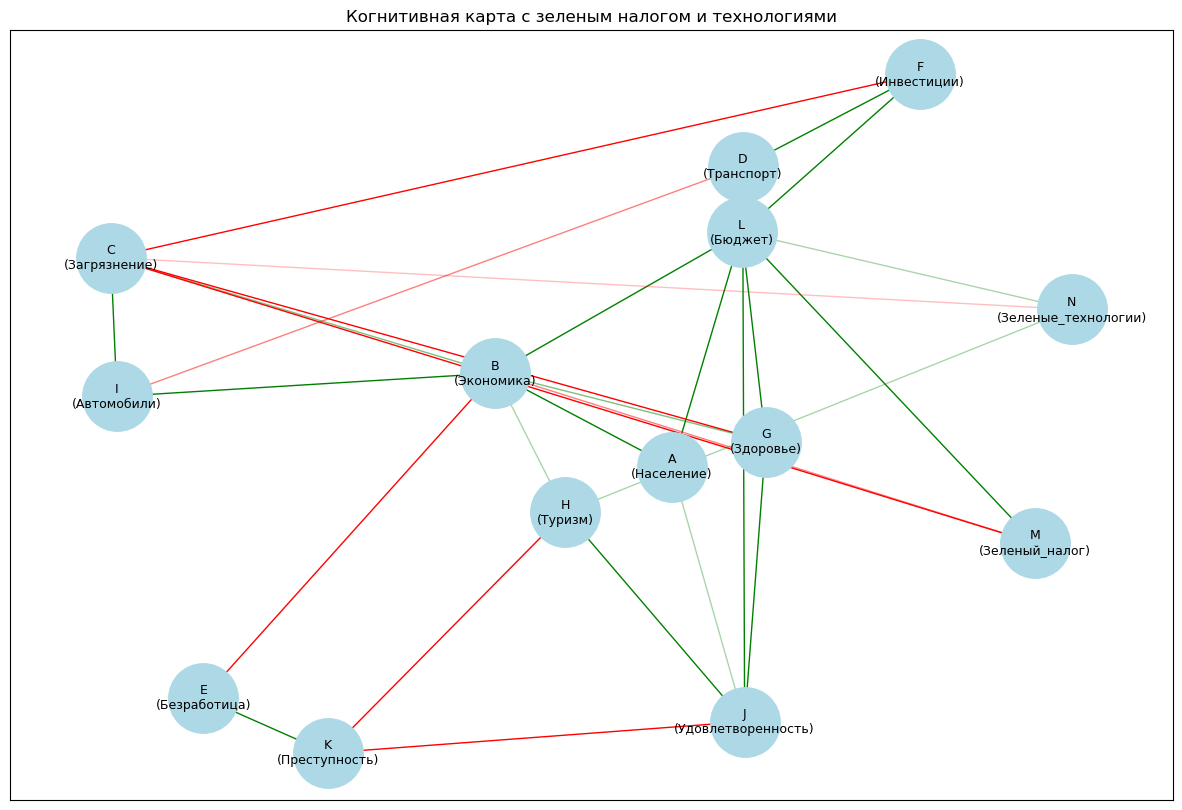


Эксперимент 3: Влияние зеленого налога
Шаг   | Налог(M) | Загрязнение(C) | Экономика(B) | Технологии(N) | Туризм(H) | Здоровье(G)
-----------------------------------------------------------------------------------------------
0     |     0.00 |     1.80 |     2.00 |     0.00 |     1.00 |     2.20
3     |     1.66 |     1.79 |     1.92 |     1.91 |     1.68 |     1.39
6     |     1.67 |     0.68 |     1.96 |     1.95 |     1.89 |     1.65
9     |     1.67 |     0.51 |     1.98 |     1.95 |     1.89 |     1.77
12    |     1.66 |     0.51 |     1.98 |     1.95 |     1.89 |     1.76


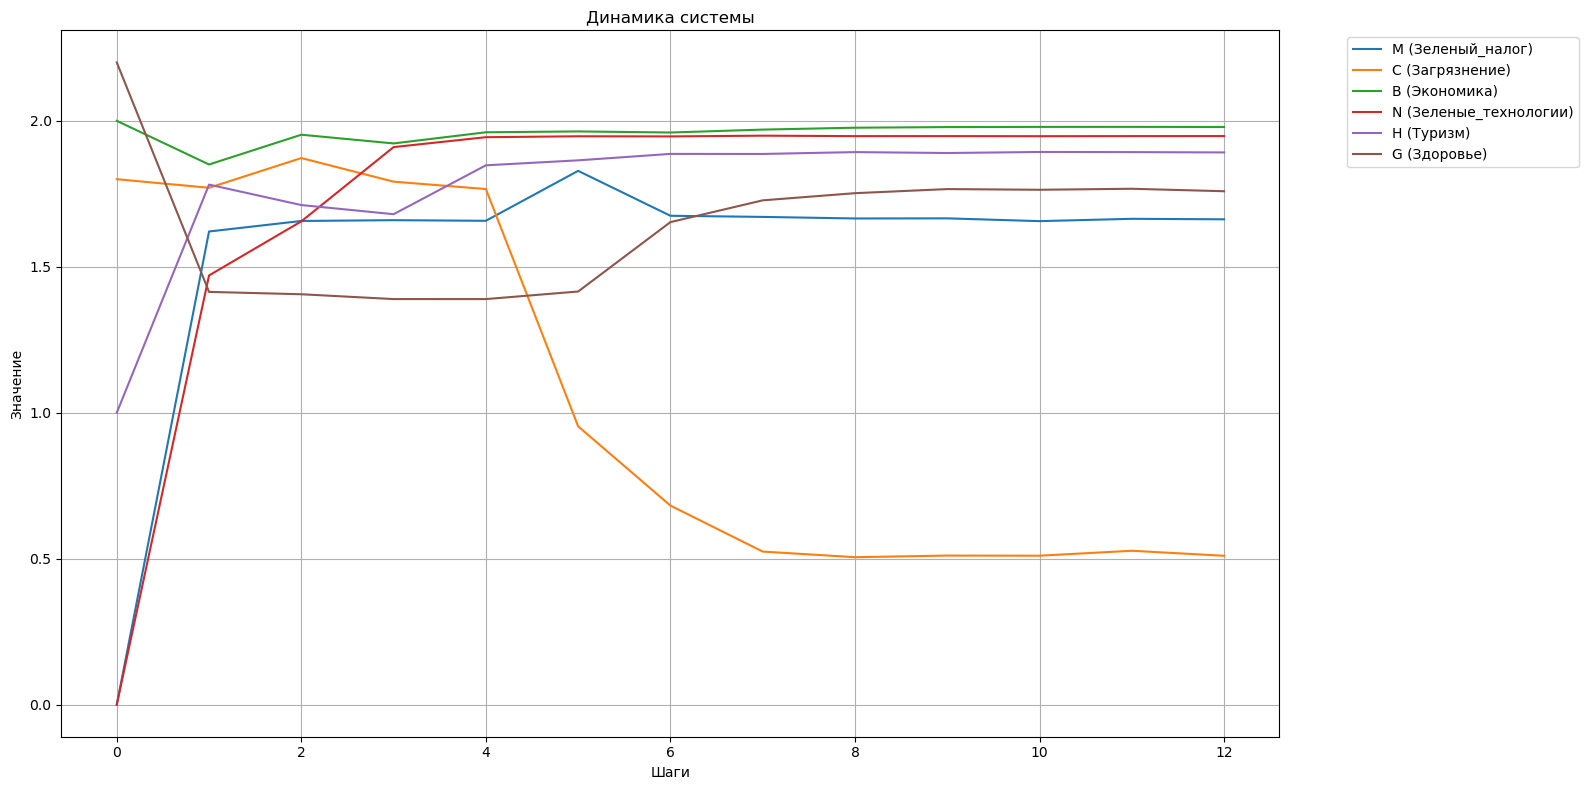


Ключевые соотношения:
Экономика/Загрязнение: 3.9 (начало: 1.1)
Бюджет/Технологии: 1.0
Туризм/Автомобили: 3.6

Проверка гипотез:
1. Снижение загрязнения: 71.7%
2. Рост транспорта: 29.1%
3. Спад экономики: 1.1%


In [43]:
cm3 = CityCognitiveMap(nonlin_func='sigmoid')

concepts = [
    ('A', 'Население', 1.2),
    ('B', 'Экономика', 2.0),
    ('C', 'Загрязнение', 1.8),
    ('D', 'Транспорт', 1.5),
    ('E', 'Безработица', 0.8),
    ('F', 'Инвестиции', 1.0),
    ('G', 'Здоровье', 2.2),
    ('H', 'Туризм', 1.0),
    ('I', 'Автомобили', 1.5),
    ('J', 'Удовлетворенность', 1.8),
    ('K', 'Преступность', 0.6),
    ('L', 'Бюджет', 1.5),
    ('M', 'Зеленый_налог', 0.0),  # Новый концепт
    ('N', 'Зеленые_технологии', 0.0)  # Новый концепт
]

for symbol, name, init in concepts:
    cm3.add_concept(symbol, name, initial=init)

base_connections = [
    ('A', 'B', 0.7, 0),
    ('B', 'C', 0.6, 1),
    ('B', 'L', 0.5, 0),
    ('L', 'F', 0.8, 0),
    ('F', 'D', 0.9, 0),
    ('D', 'I', -0.7, 1),
    ('I', 'C', 0.6, 0),
    ('C', 'G', -0.8, 0),
    ('G', 'J', 0.7, 0),
    ('J', 'H', 0.6, 0),
    ('H', 'B', 0.5, 2),
    ('B', 'E', -0.9, 0),
    ('E', 'K', 0.7, 0),
    ('K', 'H', -0.6, 0),
    ('A', 'L', 0.4, 0),
    ('G', 'B', 0.3, 1),
    ('F', 'C', -0.5, 0),
    ('L', 'G', 0.4, 0),
    ('J', 'A', 0.2, 2),
    ('K', 'J', -0.5, 0),
    ('B', 'I', 0.2, 0), 
    ('D', 'J', 0.5, 0)  
]

new_connections = [
    ('M', 'C', -0.8, 0),
    ('M', 'B', -0.4, 1),
    ('M', 'L', 0.6, 0),
    ('L', 'N', 0.5, 2),
    ('N', 'C', -0.7, 3),
    ('N', 'H', 0.3, 2)
]

for conn in base_connections + new_connections:
    cm3.add_connection(*conn)

cm3.visualize(title="Когнитивная карта с зеленым налогом и технологиями")

history_ex3 = cm3.simulate(
    steps=12,
    damping=0.82,
    noise_level=0.05,
    external={
        0: {'M': 0.45},  # 15% налог от range_scale=3.0 (0.15*3=0.45)
        4: {'M': 0.75}   # 25% налог
    }
)

print("\nЭксперимент 3: Влияние зеленого налога")
print("{:<5} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8} | {:<8}".format(
    "Шаг", "Налог(M)", "Загрязнение(C)", "Экономика(B)", 
    "Технологии(N)", "Туризм(H)", "Здоровье(G)"
))
print("-"*95)

for step in [0, 3, 6, 9, 12]:
    vals = history_ex3[step]
    print("{:<5} | {:>8.2f} | {:>8.2f} | {:>8.2f} | {:>8.2f} | {:>8.2f} | {:>8.2f}".format(
        step,
        vals['M'],
        vals['C'],
        vals['B'],
        vals['N'],
        vals['H'],
        vals['G']
    ))

cm3.plot_history(
    history_ex3, 
    concepts=['M', 'C', 'B', 'N', 'H', 'G'],
    figsize=(16, 8)
)

final = history_ex3[-1]
print("\nКлючевые соотношения:")
print(f"Экономика/Загрязнение: {final['B']/final['C']:.1f} (начало: {2.0/1.8:.1f})")
print(f"Бюджет/Технологии: {final['L']/final['N']:.1f}")
print(f"Туризм/Автомобили: {final['H']/final['I']:.1f}")

print("\nПроверка гипотез:")
print(f"1. Снижение загрязнения: {(1.8 - final['C'])/1.8*100:.1f}%")
print(f"2. Рост транспорта: {(final['D'] - 1.5)/1.5*100:.1f}%")
print(f"3. Спад экономики: {(2.0 - final['B'])/2.0*100:.1f}%")